Pandas ile Veri Analizi


### Soru 1:
* Stackoverflow'un 2019 yılı için geliştiricilerle yaptığı anket sonuçlarını içeren ```"survey_results_public.csv"``` adlı dosyayı okuyarak __survey_19__ adlı DataFrame'e aktarın.
* DataFrame'in satır ve sütun sayısını yazdırın.
* ```Respondent``` sütununu index olarak atayın.
* Aşağıdaki sütunları dataframe'den siliniz:

    ``` ['ScreenName', 'SOVisit1st','SOVisitFreq', 'SOVisitTo', 'SOFindAnswer', 'SOTimeSaved', 'SOHowMuchTime', 'SOAccount',   'SOPartFreq', 'SOJobs', 'EntTeams', 'SOComm', 'WelcomeChange', 'SONewContent']``` 
  
  
* ```DevType``` ya da ```LanguageWorkedWith``` sütununda eksik veri olan satırları siliniz. Kaç satır silindi?
* ```Country``` sütunundaki ```Russian Federation``` ve ```Czech Republic``` değerlerini sırasıyla ```Russia``` ve ```Czechia``` olarak değiştiriniz.
* Haftalık çalışma saati ```(WorkWeekHrs)``` ya da yıllık maaş ```(ConvertedComp)``` sütunlarındaki değerleri, ilgili sütunun ortalamasının %99'undan daha uzakta veri içeren satırları siliniz.
* ```Gender``` sütununda ```Man```, ```Woman``` ve ```NaN``` dışındaki değerleri, ```Non-binary``` değeri ile değiştirin.

In [205]:
import pandas as pd
#"survey_results_public.csv" adlı dosyayı okuyarak survey_19 adlı DataFrame'e aktarma
survey_19=pd.read_csv("survey_results_public.csv")
#DataFrame'in satır ve sütun sayısını yazdırma
print("(satır,sütun) sayıları =",survey_19.shape)
#Respondent sütununu index olarak atama
survey_19.set_index('Respondent', inplace = True)
#Söylenen sütunları dataframe'den silme
survey_19.drop(['ScreenName', 'SOVisit1st','SOVisitFreq', 'SOVisitTo', 'SOFindAnswer', 'SOTimeSaved', 'SOHowMuchTime', 'SOAccount',   'SOPartFreq', 'SOJobs', 'EntTeams', 'SOComm', 'WelcomeChange', 'SONewContent'] , axis=1, inplace=True)
#DevType ya da LanguageWorkedWith sütununda eksik veri olan satırları silme ve sayısı
print("silinen satır sayısı= ",survey_19.shape[0]-survey_19.dropna(subset=['DevType', 'LanguageWorkedWith']).shape[0])
survey_19.dropna(subset=['DevType', 'LanguageWorkedWith'], inplace = True)
#Russia ve Czechia olarak değiştirme
survey_19["Country"].replace({"Russian Federation": "Russia", "Czech Republic ": "Czechia"}, inplace=True)
#%99'undan daha uzakta veri içeren satırları silme
survey_19.drop(survey_19[(survey_19['WorkWeekHrs']<survey_19['WorkWeekHrs'].mean(axis = 0)-survey_19['WorkWeekHrs'].mean(axis = 0)*99/100) |
           (survey_19['WorkWeekHrs']>survey_19['WorkWeekHrs'].mean()+survey_19['WorkWeekHrs'].mean()*99/100) |
          (survey_19['ConvertedComp']<survey_19['ConvertedComp'].mean()-survey_19['ConvertedComp'].mean()*99/100) |
           (survey_19['ConvertedComp']>survey_19['ConvertedComp'].mean()+survey_19['ConvertedComp'].mean()*99/100)].index, inplace = True)
#Gender sütununda Man, Woman ve NaN dışındaki değerleri, Non-binary değeri ile değiştirme
gecerliler = ['Man','Woman','NaN']
survey_19.loc[~survey_19["Gender"].isin(gecerliler), "Gender"] = "Non-binary"

(satır,sütun) sayıları = (88883, 85)
silinen satır sayısı=  8351


### Soru 2:
* ```Age``` sütununu 0, 15, 19, 24, 29, 34, 39, 44, 49, 54, 59, 99 binleri ile aralığa çevirerek ```AgeInterval``` adında yeni bir sütun oluşturunuz.
* Ankete katılanların yaş aralıklarına göre dağılımını pasta grafiğinde gösteriniz. 
* (19-24] yaş aralığının en çok kullandığı sosyal medya nedir?

En çok kullanılan sosyal medya(19,24]: Reddit


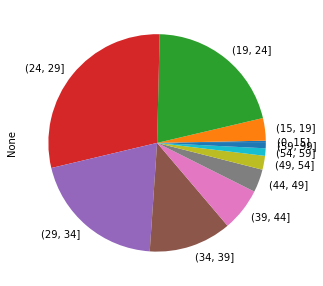

In [206]:
survey_19['AgeInterval'] = pd.cut(x=survey_19['Age'], bins=[0, 15, 19, 24, 29, 34, 39, 44, 49, 54, 59, 99])
aralik = survey_19.groupby('AgeInterval').size()
aralik.plot.pie(figsize=(9,5))
print("En çok kullanılan sosyal medya(19,24]:",survey_19[(survey_19['Age']>19) & (survey_19['Age']<=24) ].SocialMedia.mode()[0])

### Soru 3:
* DataFrame'i kariyer memnuniyetine ```(CareerSat)``` göre gruplayıp her bir memnuniyet grubundakilerin yıllık kazanç ```(ConvertedComp)``` ortalamasını bularak çizgi grafiği çiziniz. Çizgi grafiğinde X-ekseni en düşük memnuniyetten en yüksek memnuniyete doğru olmalıdır.

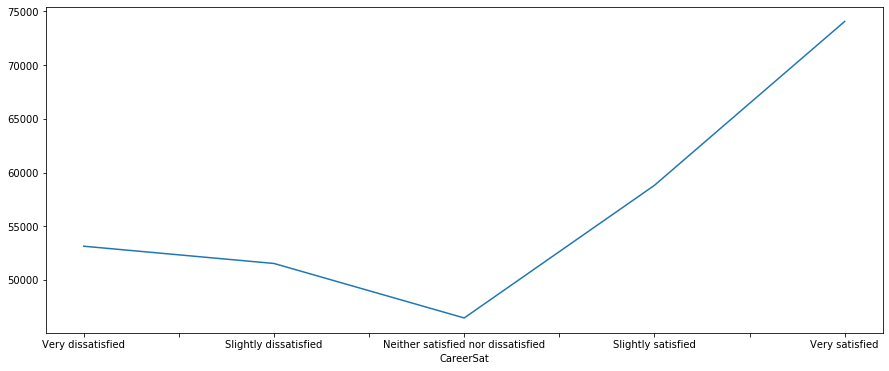

In [208]:
import matplotlib.pylab as plt
fig, ax = plt.subplots(figsize=(15,6))
a=survey_19.groupby('CareerSat')["ConvertedComp"].mean()
new_index = ['Very dissatisfied', 'Slightly dissatisfied', 'Neither satisfied nor dissatisfied', 'Slightly satisfied','Very satisfied']
a.reindex(new_index).plot(x='CareerSat')

### Soru 4: 
Kadınların daha çok tercih ettiği/edildiği (ankete katılan kadın-erkek oranından daha yüksek orana sahip) geliştirici tipleri ```(DevType)```nelerdir?
* Her bir ```DevType``` tipinin sütun olarak, ankete katılanların da satır olarak temsil edildiği yeni bir DataFrame oluşturup __devtype_df__ adlı değişkene atayın.
* Oluşan __devtype_df__ DataFrame'ine ```Gender``` sütununu ekleyin.
* DataFrame'i cinsiyete göre gruplayarak her bir ```DevType``` için cinsiyete göre sayıları bulun.
* ```DevType``` tiplerindeki kadın-erkek oranlarını, ankete katılan kadın-erkek oranı ile karşılaştırarak kadınların daha çok tercih ettiği/edildiği ```DevType``` tiplerini listeleyin.

In [209]:
devtype_df = pd.DataFrame(survey_19['DevType'], columns = ['DevType'])
#Gender sütununu ekleme
devtype_df['Gender']=survey_19['Gender']
#cinsiyete göre gruplayarak her bir DevType için cinsiyete göre sayıları bulma
print(devtype_df.groupby('Gender')['DevType'].value_counts())

print("\nkadınların daha çok tercih ettiği/edildiği DevType tipleri")
print("---------------------------------------------------------------------------------------------------------------------")
#kadınların daha çok tercih ettiği/edildiği DevType tiplerini listeleme
erkek_say=survey_19['Gender'].value_counts()[0]
kadin_say=survey_19['Gender'].value_counts()[1]
res = devtype_df.pivot_table(index='DevType', columns='Gender', aggfunc='size', fill_value=0)
a=res[(res['Woman'] / res['Man'])>(kadin_say/erkek_say)].index
print(*a.str.split(';'),sep = "\n")  

Gender  DevType                                                            
Man     Developer, full-stack                                                  6784
        Developer, back-end                                                    3945
        Developer, back-end;Developer, front-end;Developer, full-stack         2029
        Developer, mobile                                                      1773
        Developer, back-end;Developer, full-stack                              1692
                                                                               ... 
Woman   Marketing or sales professional;Product manager                           1
        Marketing or sales professional;Product manager;Senior executive/VP       1
        Marketing or sales professional;Student                                   1
        Scientist;Student                                                         1
        Student;System administrator                                              1


### Soru 5: 
Ankete katılım sayısı bakımından ilk ve son 10 ülkeyi tek bir figürde yan yana iki ayrı alt grafik (subplot) olacak şekilde pasta grafiği ile gösteriniz.

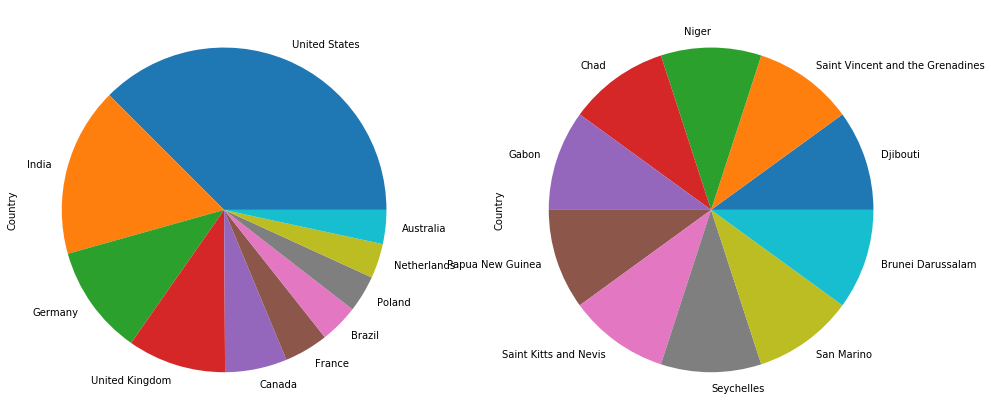

In [210]:
import matplotlib.pyplot as plt
ilk_on=survey_19['Country'].value_counts().head(10)
son_on=survey_19['Country'].value_counts().tail(10)
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(16,8))
ilk_on.plot.pie(ax = axes[0],subplots=True) 
son_on.plot.pie(ax = axes[1],subplots=True) 
plt.show()

### Soru 6: 
Veri Bilimcilerin (```DevType``` sütununda ```Data scientist or machine learning specialist``` değerini içeren) en çok kullandığı dil ```(LanguageWorkedWith)``` nedir? Tüm kullandıkları dillerin yüzdelerini bulunuz ve yatay bar plot olarak gösteriniz.

En çok kullanılan dil :  Python


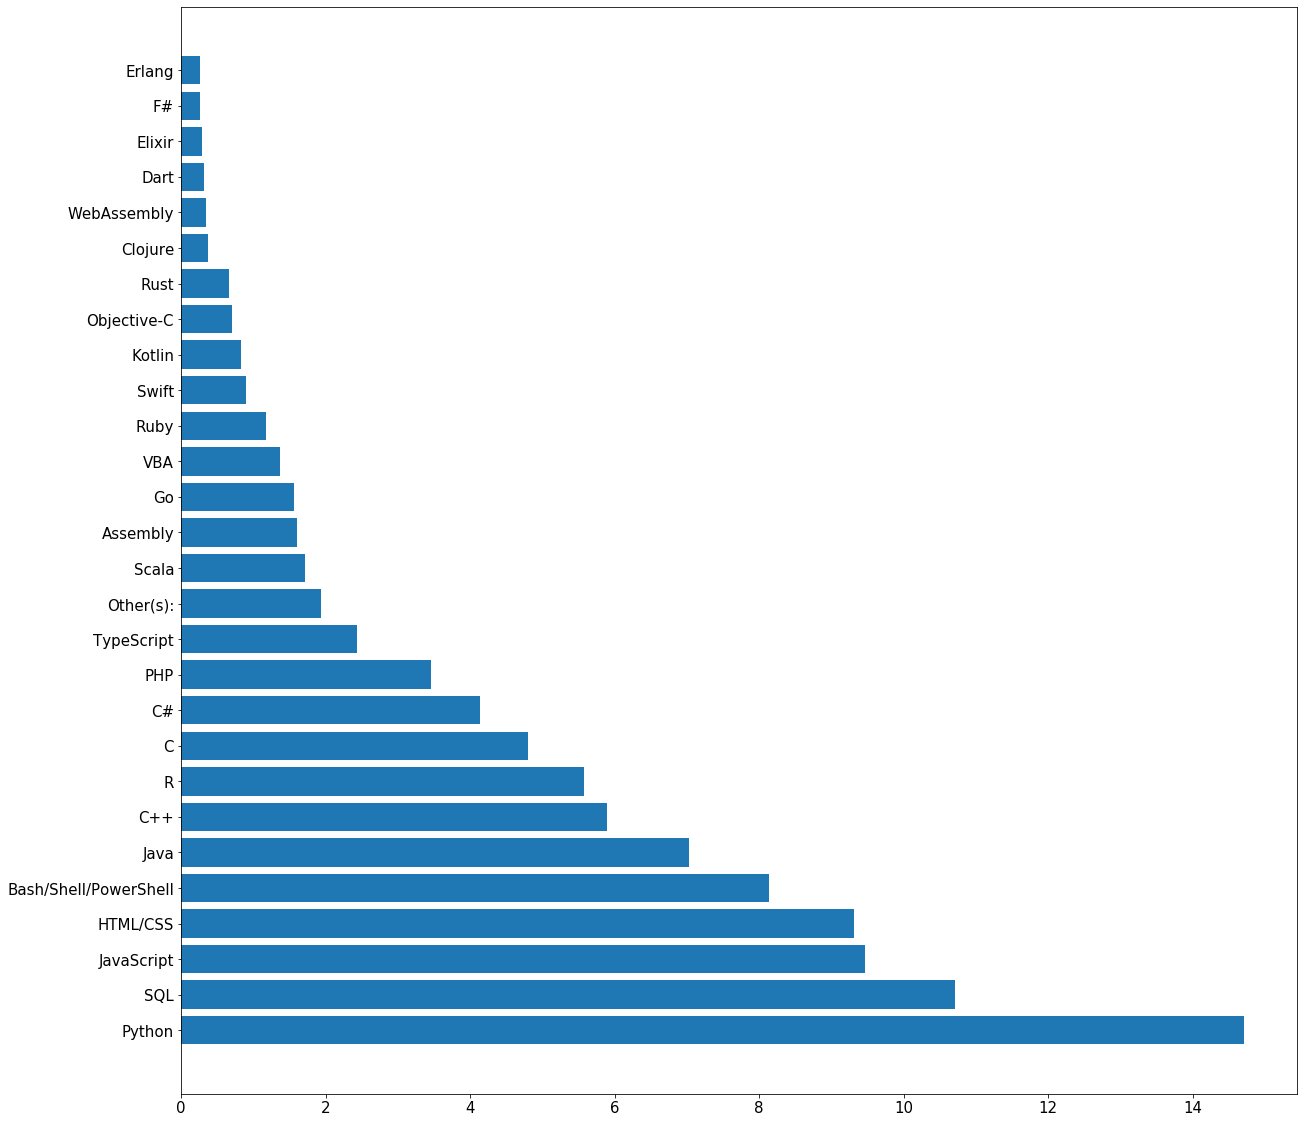

In [211]:
import matplotlib.pyplot as plt
encok=survey_19[survey_19['DevType'].str.contains('Data scientist or machine learning specialist').fillna(False)].LanguageWorkedWith.str.split(';', expand = True).stack().mode()[0] 
print("En çok kullanılan dil : ",encok)
diller=survey_19[survey_19['DevType'].str.contains('Data scientist or machine learning specialist').fillna(False)].LanguageWorkedWith.str.split(';', expand = True).stack().value_counts()
toplam=survey_19[survey_19['DevType'].str.contains('Data scientist or machine learning specialist').fillna(False)].LanguageWorkedWith.str.split(';', expand = True).stack().value_counts().sum()
yuzde=100*diller/toplam
fig = plt.figure(figsize = (20,20))
plt.barh(diller.index,yuzde)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.show()

### Soru 7:
* Haftalık çalışma saatlerinin ```(WorkWeekHrs)``` ülke bazlı ortalama, standart sapma ve medyan değerlerinden oluşan bir dataframe oluşturunuz.
* Ortalamaya göre büyükten küçüğe sıralayınız. 
* Türkiye'nin kaçıncı sırada olduğunu ve haftalık çalışma saatini bulunuz.

In [212]:
#(WorkWeekHrs) ülke bazlı ortalama, standart sapma ve medyan değerlerinden oluşan bir dataframe oluşturma
haftalik=pd.DataFrame()
haftalik['Ortalama']=survey_19.groupby('Country')["WorkWeekHrs"].mean()
haftalik['Standart Sapma']=survey_19.groupby('Country')["WorkWeekHrs"].std()
haftalik['Medyan']=survey_19.groupby('Country')["WorkWeekHrs"].median()
#Ortalamaya göre büyükten küçüğe sıralama
haftalik.sort_values(by=['Ortalama'], inplace=True, ascending=False)
#Türkiye'nin kaçıncı sırada olduğunu ve haftalık çalışma saati bulma
for row in range(haftalik.shape[0]):
    if haftalik.index[row] == 'Turkey':
        print("Türkiye'nin sırası(index 0 dan başladığı için -> index+1): ",row+1)
        print("Haftalık ortalama çalışma saati: ",haftalik.Ortalama[row])
        break         

Türkiye'nin sırası(index 0 dan başladığı için -> index+1):  41
Haftalık ortalama çalışma saati:  41.055263157894736


### Soru 8:
Ankete katılanların ortalama haftada kaç saat kod incelediği bilgisini ```(CodeRevHrs)``` kullanarak 40 saatten az kod inceleyenler ile bir histogram (bins=20) çiziniz.


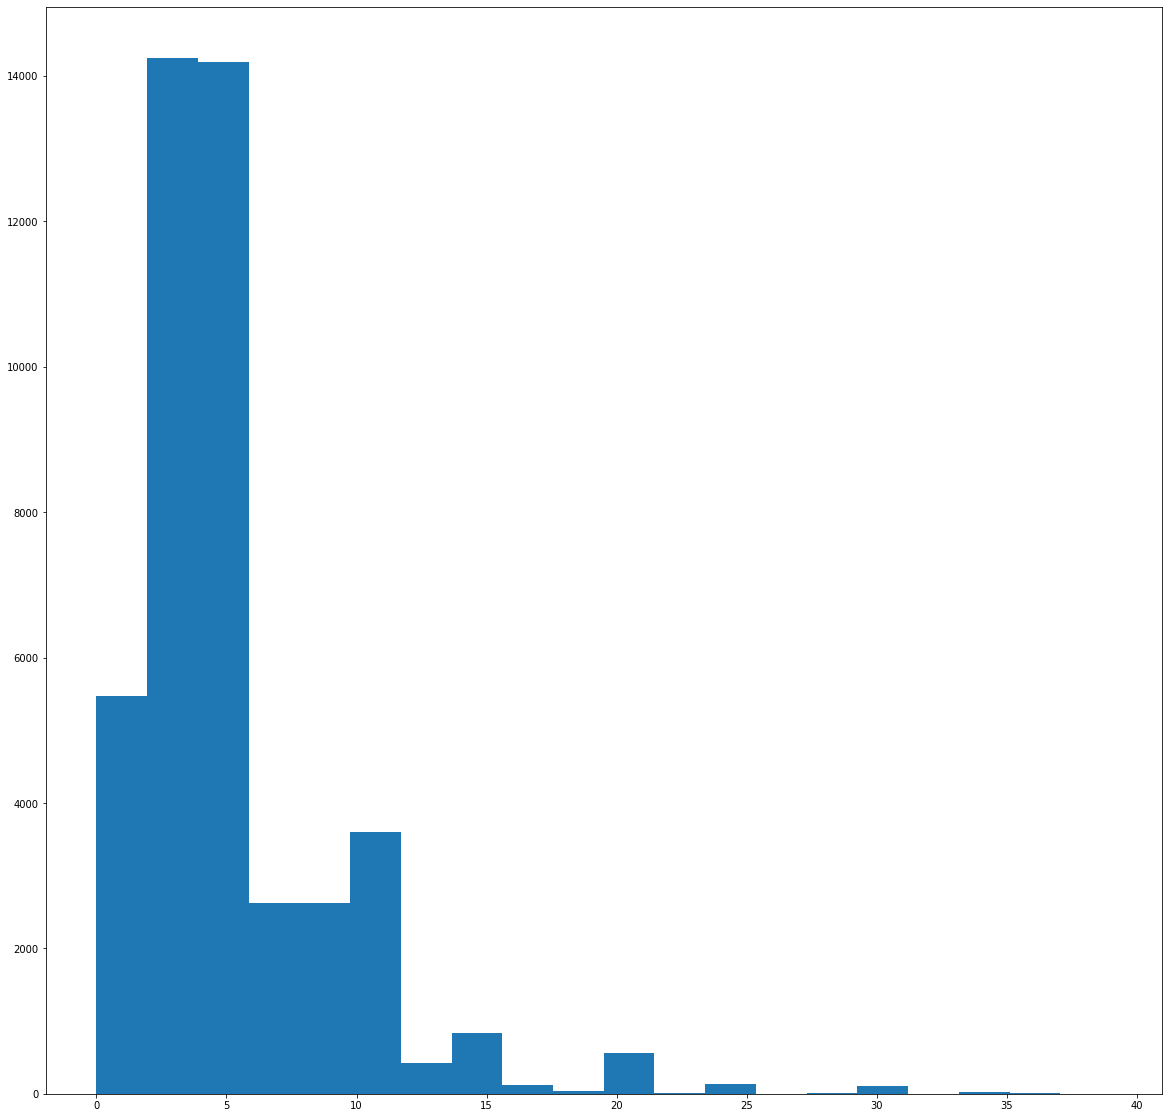

In [213]:
import matplotlib.pyplot as plt
liste=survey_19[survey_19['CodeRevHrs']<40]['CodeRevHrs']
figure = plt.figure(figsize = (20,20))
plt.hist(liste,bins=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

### Soru 9:
* ```MainBranch``` sütununda bulunan değerleri aşağıdaki değerler ile değiştirin.

    ``` {'I am a student who is learning to code': 'Student',
    'I am not primarily a developer, but I write code sometimes as part of my work': 'Not a Developer',
    'I am a developer by profession':  'Developer',
    'I code primarily as a hobby':   'Code as hobby',
    'I used to be a developer by profession, but no longer am': 'Was a Developer'} 
    ```
* Ana branş ```(MainBranch)``` X-ekseninde olacak şekilde her bir branştakilerin sayısını bar plot ile gösteriniz. Her bir bar, Cinsiyet ```(Gender)``` sayısına göre yığıt (stacked) şeklinde gösterilmelidir. 
* Ana branşı ```Developer``` olan ve Türkiye'den ankete katılanların eğitim seviyelerine göre dağılımını pasta grafiği ile gösteriniz.

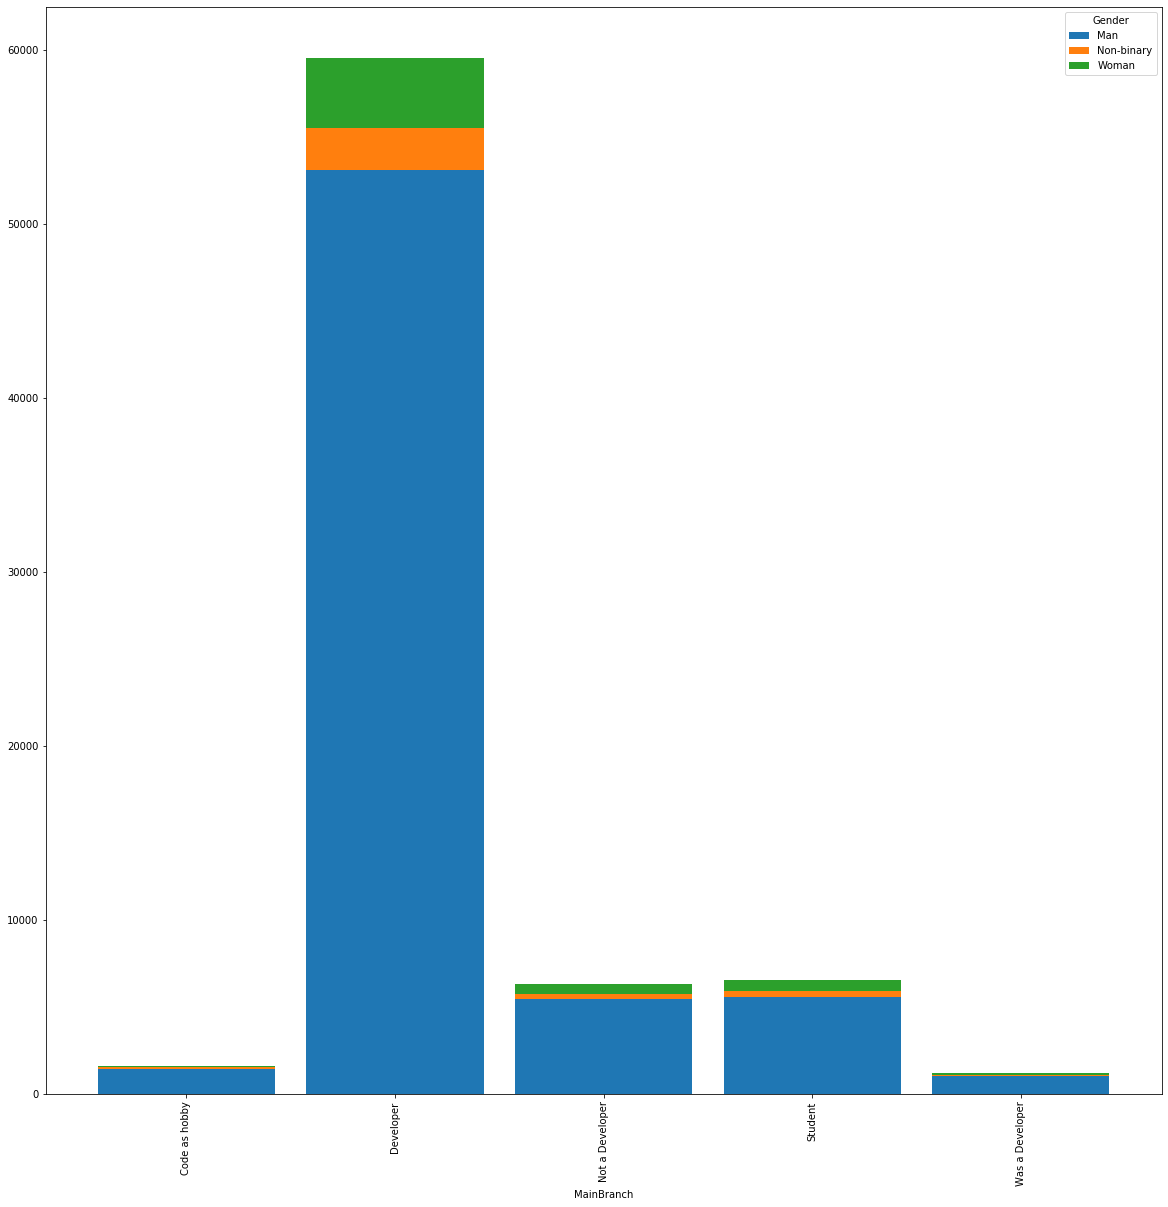

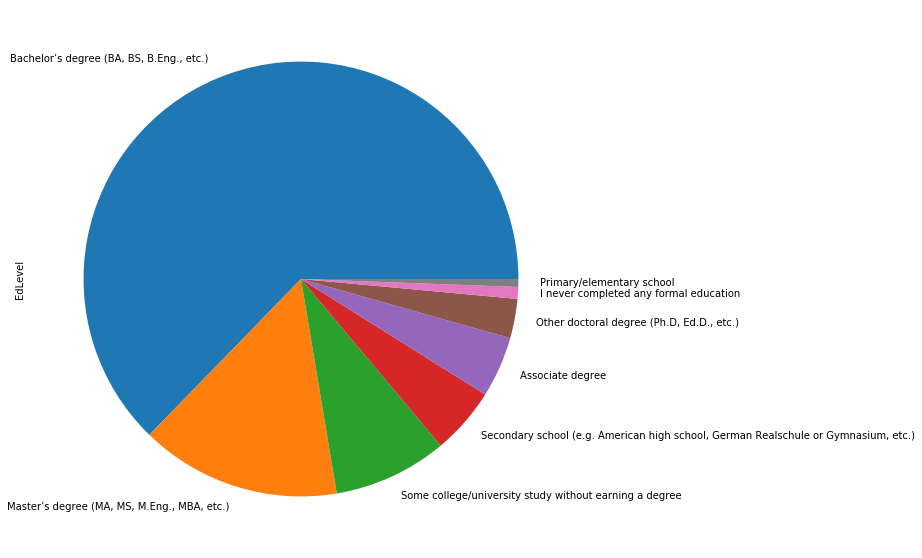

In [214]:
survey_19['MainBranch'].replace({'I am a student who is learning to code': 'Student',
  'I am not primarily a developer, but I write code sometimes as part of my work': 'Not a Developer',
  'I am a developer by profession':  'Developer',
  'I code primarily as a hobby':   'Code as hobby',
  'I used to be a developer by profession, but no longer am': 'Was a Developer'},inplace=True) 
#bar plot çizimi
survey_19.groupby(['MainBranch','Gender']).size().unstack().plot(kind='bar',stacked=True,figsize=(20, 20),zorder=2, width=0.85 )
plt.show()
#pasta grafiği çizimi
edlev=survey_19[(survey_19['MainBranch'].str.contains('Developer').fillna(False))&
                (survey_19['Country'].str.contains('Turkey').fillna(False))].EdLevel.value_counts()
edlev.plot.pie(figsize=(15,10))

### Soru 10:
Türkiye'den ankete katılan ve TL cinsinden maaş alanların ortalama yıllık brüt maaşını bulunuz. 
* ```CurrencySymbol, CompTotal ve CompFreq``` sütunlarını kullanın.
* Her üç sütundan herhangi biri NaN olan satırları ihmal ediniz. 
* Frekansı ```(CompFreq)``` haftalık olanlar için bir yılı 50 hafta, aylık olanlar için ise 12 ay olarak düşününüz.

In [215]:
#kopyalama işlemini ana dataframe değişmesin diye yaptım(NaN satırları silcem)
s_copy = survey_19.copy()
a=s_copy.dropna(subset=['CurrencySymbol', 'CompTotal', 'CompFreq'])
b=a[(a['CurrencySymbol'].str.contains('TRY').fillna(False))&(a['Country'].str.contains('Turkey').fillna(False))]
ay=b[b['CompFreq'].str.contains('Monthly').fillna(False)].CompTotal*12
haf=b[b['CompFreq'].str.contains('Weekly').fillna(False)].CompTotal*50
yil=b[b['CompFreq'].str.contains('Yearly').fillna(False)].CompTotal*1
ort=(ay.sum()+haf.sum()+yil.sum())/(len(ay)+len(haf)+len(yil))
print("Sonuç : ",round(ort,2))

Sonuç :  107754.04


### Soru 11:
Her bir işletim sistemi ```(OpSys)``` için,  açık kaynağa katkı verme sıklıklarına ```(OpenSourcer)``` göre anketör sayılarını bar grafik ile gösteriniz.

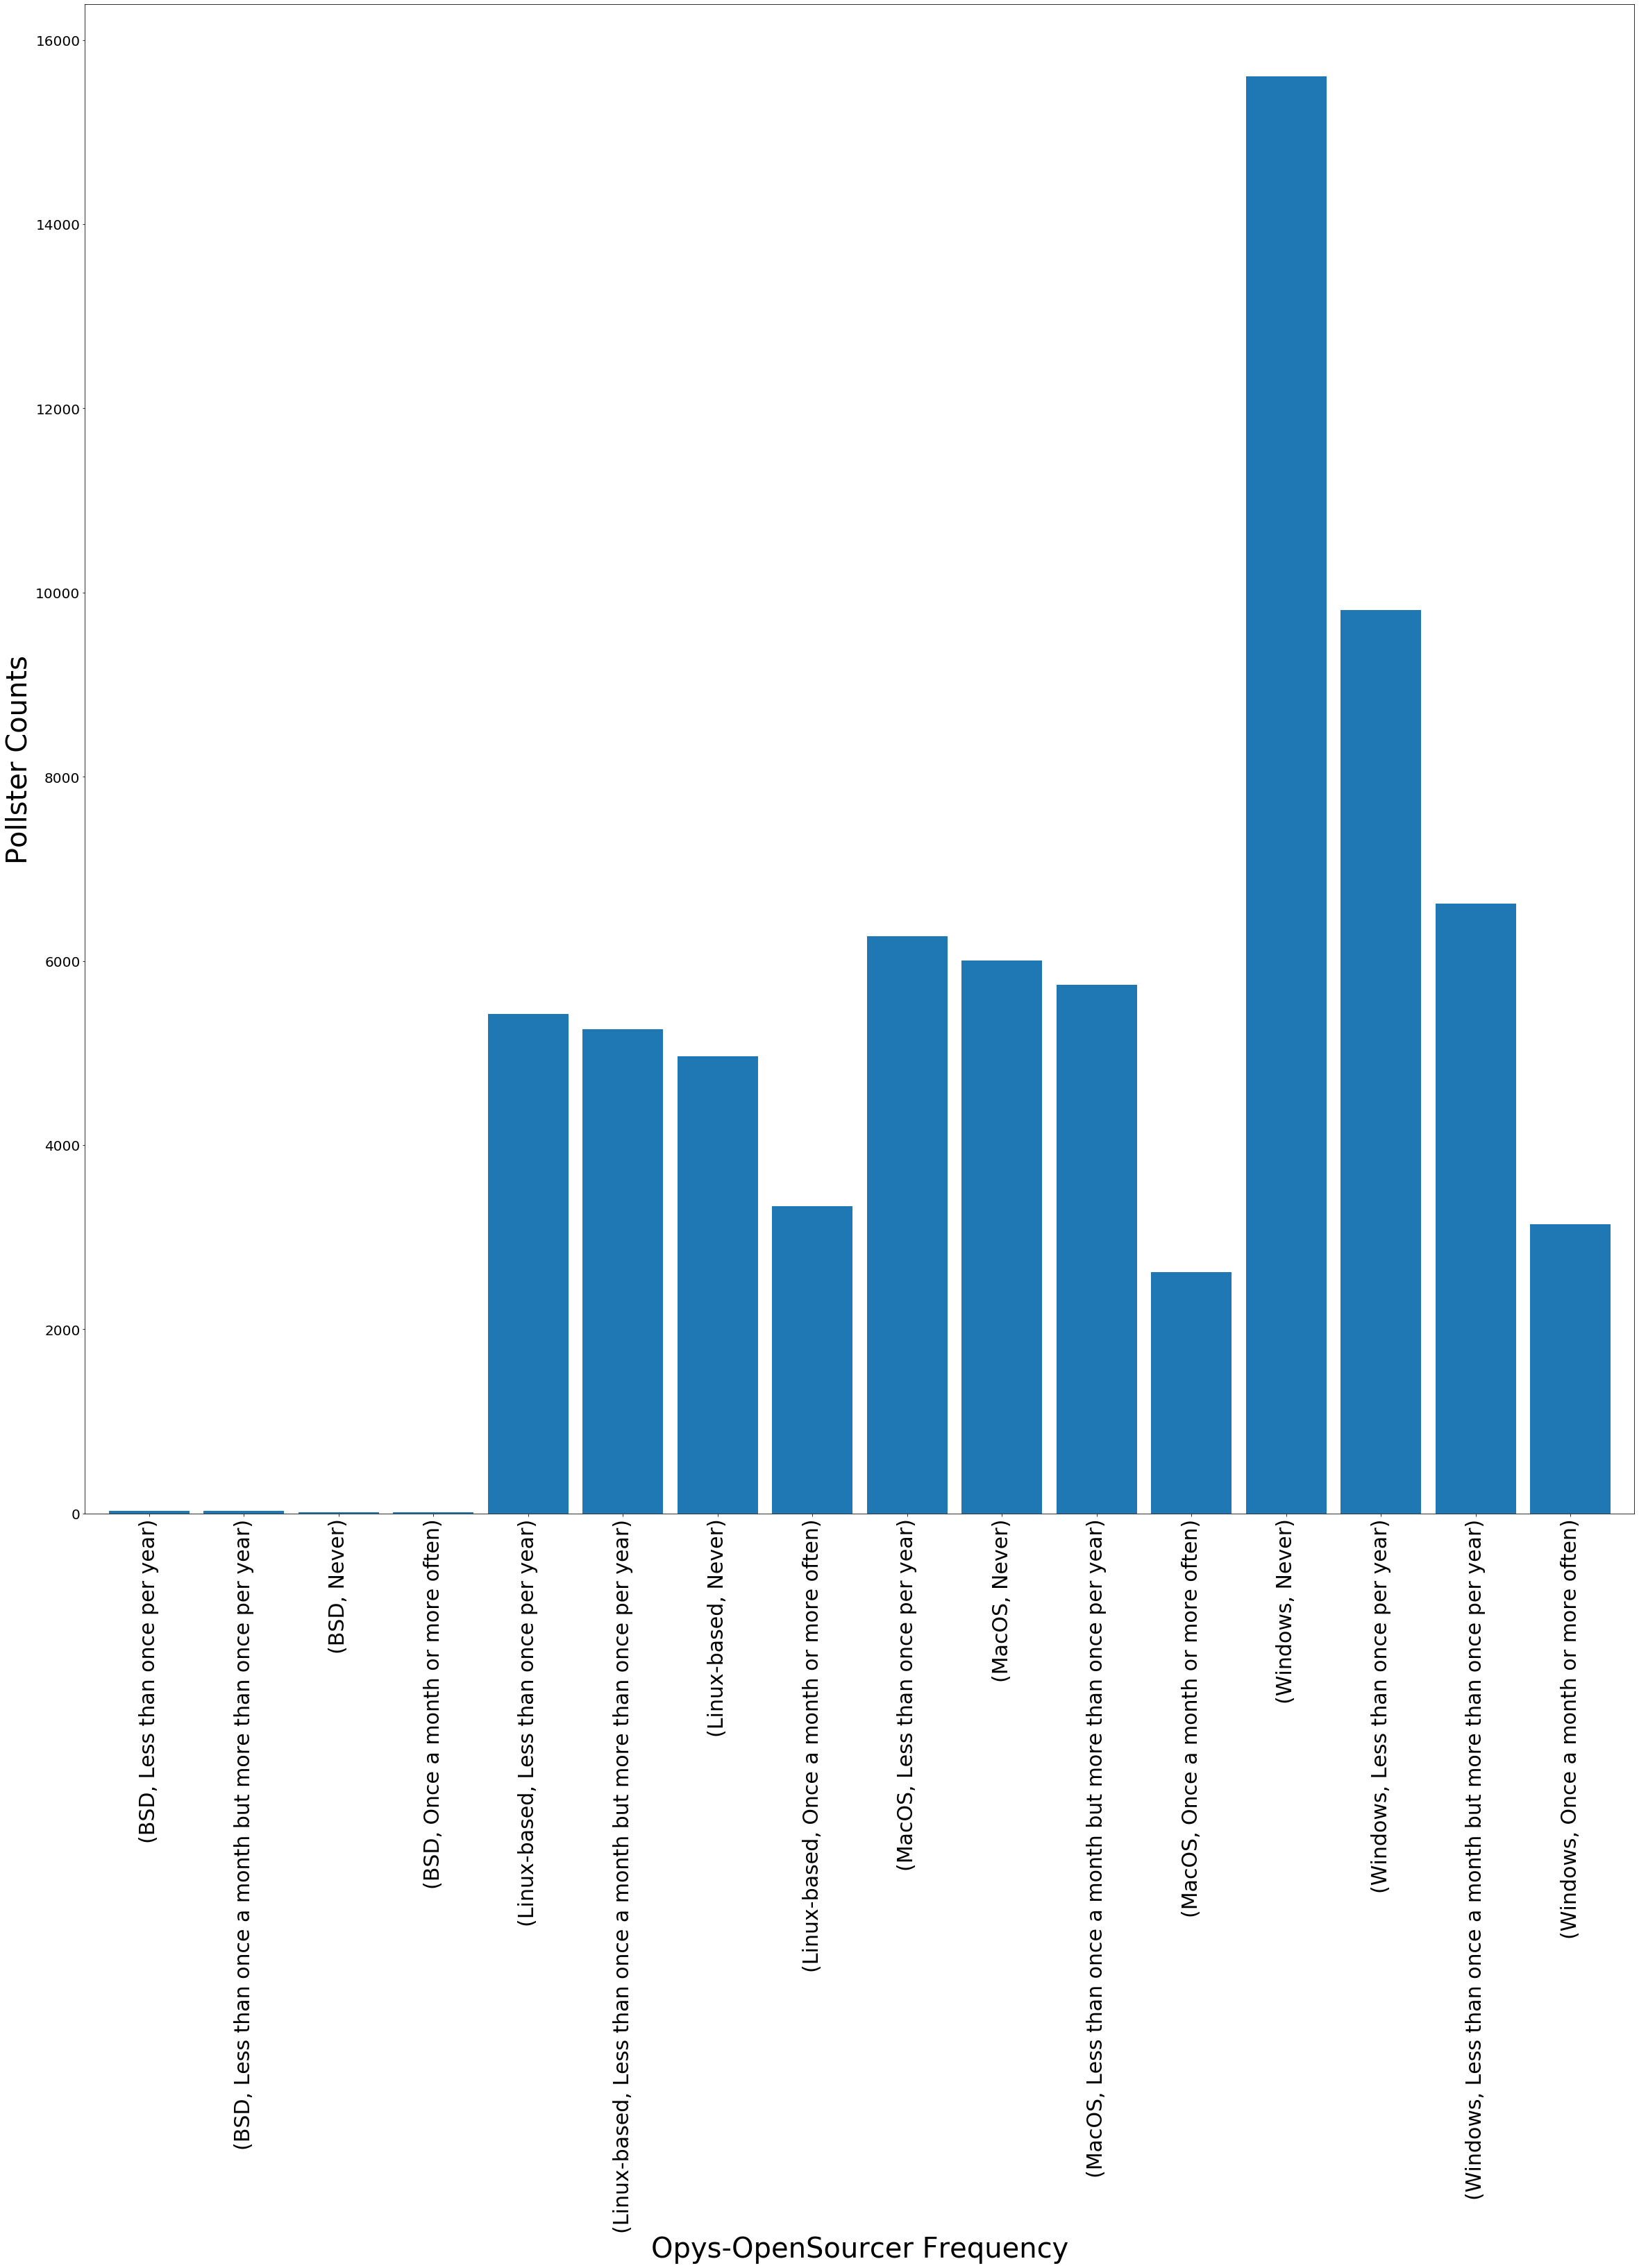

In [216]:
ax=survey_19.groupby('OpSys')['OpenSourcer'].value_counts().plot(kind='bar',figsize=(40, 40), width=0.85 )
plt.tick_params(axis='x', labelsize=30)
plt.tick_params(axis='y', labelsize=20)
ax.set_ylabel("Pollster Counts", fontsize=40)
ax.set_xlabel("Opys-OpenSourcer Frequency", fontsize=40)
plt.show()

### Soru 12:
* https://download.geonames.org/export/dump/countryInfo.txt adresindeki veriyi:
    * ilk 49 satırını ihmal ederek
    * yalnızca ```Country, Continent, CurrencyCode``` sütunlarını kullanarak 
    * ```Country``` sütununu indeks sütun olarak 
    * ```NA``` filtreleme yapmadan (```North America``` kıtasının kısaltması olan ```NA```'yı ```NaN``` değer olarak okumamak için)
  
  okuyarak __country_info__ adlı DataFrame'e aktarınız.
  
  
*     

           {AF : Africa
            AS : Asia			
            EU : Europe			
            NA : North America		
            OC : Oceania			
            SA : South America		
            AN : Antarctica	} 

   yukarıdaki haritalamayı kullanarak kıta isimlerini içeren ```ContinentName``` isimli yeni bir sütun oluşturunuz.

In [217]:
#adresteki veriyi indirip excele "13data.xlsx" olarak kaydettim
country_info=pd.read_excel(r"13data.xlsx",skiprows=49,usecols=["Country", "Continent", "CurrencyCode"],index_col='Country')

dict= {'AF' : 'Africa',
      'AS' : 'Asia',            
      'EU' : 'Europe' ,           
      'NA': 'North America',        
      'OC' : 'Oceania',            
      'SA' : 'South America',        
      'AN' : 'Antarctica'    } 
country_info['ContinentName']=country_info['Continent'].map(dict)
country_info

,Continent,CurrencyCode,ContinentName
Country,,,
Andorra,EU,EUR,Europe
United Arab Emirates,AS,AED,Asia
Afghanistan,AS,AFN,Asia
Antigua and Barbuda,NaN,XCD,NaN
Anguilla,NaN,XCD,NaN
...,...,...,...
South Africa,AF,ZAR,Africa
Zambia,AF,ZMW,Africa
Zimbabwe,AF,ZWL,Africa


### Soru 13:

* __survey_19__ dataframe'i ile __country_info__ dataframe'ini ülke bazında birleştirip __merged_survey__ isimli yeni bir dataframe'e aktarınız.
* Yaşadığı ülkenin resmi para biriminin dışındaki para birimiyle maaş alan kişi sayısı nedir?
* Her bir para biriminin kaç ülkede maaş olarak verildiğini azalan sırada listeleyiniz.
* Her kıtadaki ortalama maaşı en yüksek olan ülkeyi ve ortalama maaşı listeleyiniz.


In [218]:
#merged_survey isimli yeni bir dataframe oluşturma
merged_survey=pd.merge(survey_19,country_info,on='Country')
#Yaşadığı ülkenin resmi para biriminin dışındaki para birimiyle maaş alan kişi sayısını bulma
baska_para=merged_survey [merged_survey ['CurrencySymbol']!=merged_survey ['CurrencyCode']].shape[0]
print("Yaşadığı ülkenin resmi para biriminin dışındaki para birimiyle maaş alan kişi sayısı : ",baska_para)
#Her bir para biriminin kaç ülkede maaş olarak verildiğini azalan sırada listeleme
ulke_maas=merged_survey.groupby('CurrencySymbol')["Country"].nunique().sort_values(ascending=False)
print("\n",ulke_maas.sort_values(ascending=False))
#Her kıtadaki ortalama maaşı en yüksek olan ülkeyi ve ortalama maaşı listeleme
kita=merged_survey.groupby(['Continent','Country'])[['ConvertedComp']].mean()
maxlar=kita.groupby(level=0).apply(max)
degerler=maxlar['ConvertedComp'].values
print("\n",kita.loc[kita['ConvertedComp'].isin(degerler)])
#saçılım (scatter) grafiği 
#yapamadım

Yaşadığı ülkenin resmi para biriminin dışındaki para birimiyle maaş alan kişi sayısı :  13217

 CurrencySymbol
USD    112
EUR     76
GBP     37
AED     27
AUD     20
      ... 
LBP      1
LKR      1
MGA      1
MKD      1
KGS      1
Name: Country, Length: 132, dtype: int64

                                             ConvertedComp
Continent Country                                        
AF        Democratic Republic of the Congo  110484.000000
AS        Israel                             88792.301294
EU        Andorra                           160931.000000
OC        Australia                          80930.996279
SA        Uruguay                            40106.674157
